Daniel Alconchel Vázquez

# Ejercicios Práctica 3

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from time import perf_counter as now

## Métodos de Euler

### Ejercicio 1

Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional 

Comenzamos creando un módulo para cada uno de los métodos implementados en la sesión hasta el momento:

In [2]:
%%file   eulerexplicito.py
## módulo eulerexplicito
''' método de Euler para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n],Y[n]))
    return np.array(X),np.array(Y)

Overwriting eulerexplicito.py


In [3]:
%%file eulerimplicito.py
## módulo eulerimplicito
''' método de Euler implicito para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
import sympy as sp
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    y1 = sp.Symbol('y1') # usaremos esta variable como incógnita
    for n in range(N):   # de la ecuación a resolver en cada iteración
        Y.append(sp.solve(Y[n]+h*F(X[n+1],y1)-y1,y1)[0])
    return np.array(X),np.array(Y)

Overwriting eulerimplicito.py


In [4]:
%%file eulerimplicitoaprox.py
## módulo eulerimplicitoaprox
''' método de Euler implicito aprox para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
import sympy as sp

def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    for n in range(N):   
        y1 = Y[n] + h*F(X[n],Y[n])    #  valor inicial para una
        Y.append(Y[n]+h*F(X[n+1],y1)) #  iteración de punto fijo
    return np.array(X),np.array(Y)

Overwriting eulerimplicitoaprox.py


Tomamos el PVI que aparece al comienzo del guión de prácticas:
$$x'=f(t,x)=t,\quad x(0)=1,\quad t\in [0,1]$$

In [5]:
t, y0, z = sp.symbols('t, y_0,  z')
def f(t,z):
    return z

a = 0; b = 1;   # extremos inferior y superior del intervalo 
ya = 1          # condición inicial del PVI

Ejecutamos cada uno de los métodos para los diferentes valores de $N$, por ejemplo, con $N=5+5i,\quad i=0,1,...,5$. Insertaremos las aproximaciones y el tiempo en dos vectores de la siguiente forma. Llamemos al vector `y`, que será el de las aproximaciones; y `tiempos` al vector con los tiempos, entonces:
- `y[i][metodo]` corresponde a las aproximaciones con $N=5+5i$ para el método `método`
- `tiempos[i][metodo]` corresponde al tiempo de ejecución con $N=5+5i$ para el método `metodo`

Definimos primero una función genérica para comparar métodos numéricos. Nótese que los argumentos `**args` serán los argumentos pasados a la función `integrate` de cada uno de los módulos concretados `modulos`.

> **Nota importante:** la función `comparar_metodos` toma como entrada `*args`, que es una lista de los parámetros de las funciones `integrate`. Para que no arroje una excepción, las funciones `integrate` deben tener los **mismos parámetros** y deben tener el parámetro `N` (número de iteraciones) **al final**. No tendremos problema con esto, pues todos los métodos de un paso programados tienen los mismos argumentos y en el mismo orden (excepto `eulerexplrapido`)."

In [6]:
def comparar_metodos(metodos, fN, iters, *args):
    x = []
    y = []
    tiempos = []
    metodos = list( dict.fromkeys(metodos) )   # que no se repitan métodos

    print("Comparando los métodos", metodos)
    print(f"Ejecutando {iters} iteraciones de valores de N...\n│ ")

    for i in range(iters):
        N = fN(i)
        print(f"{'└' if i == iters-1 else '├'}── Calculando para i={i}, N={N}")
        _y, _t = {}, {}
        for metodo in metodos:
            # de este modo llamamos a metodo.integrate
            module = __import__(metodo)
            func = getattr(module, "integrate")

            # contabilizamos el tiempo
            _t0 = now()
            _x, _y[metodo] = func(*args, N=N)
            _t1 = now()
            print(f"{' ' if i == iters-1 else '│'}   {'└' if metodo == metodos[-1] else '├'}── Finalizado método \'{metodo}\'")
            print(f"{' ' if i == iters-1 else '│'}   {' ' if metodo == metodos[-1] else '│'}   └── Tiempo de ejecución: {_t1-_t0}")

            _t[metodo] = _t1 - _t0
        x.append(_x); y.append(_y); tiempos.append(_t)
    
    print("\nMétodos ejecutados correctamente")
    return x, y, tiempos

In [7]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox']
Ejecutando 6 iteraciones de valores de N...
│ 
├── Calculando para i=0, N=5
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 0.00014268500000014228
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.05794991699998775
│   └── Finalizado método 'eulerimplicitoaprox'
│       └── Tiempo de ejecución: 0.00013974499999847012
├── Calculando para i=1, N=10
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 5.747400000188918e-05
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.1106757090000059
│   └── Finalizado método 'eulerimplicitoaprox'
│       └── Tiempo de ejecución: 9.527499999251177e-05
├── Calculando para i=2, N=15
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 5.312400000434536e-05
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.1915047100

Comenzamos comparando los tiempos de ejecución:

Text(0.5, 1.0, 'Tiempos de ejecución')

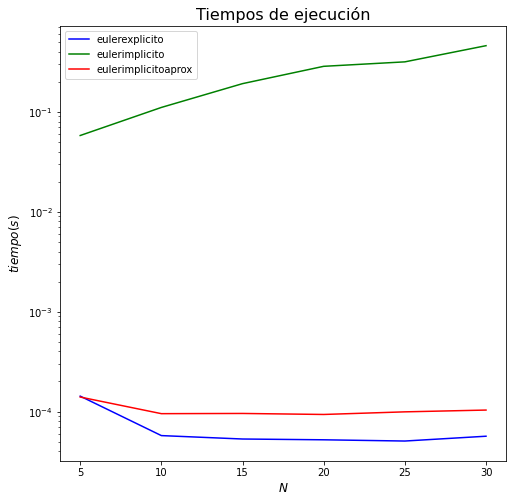

In [8]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgr"
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16)

Finalmente veamos cómo de buenas son las aproximaciones, tanto

Text(0.5, 1.0, 'Aproximaciones')

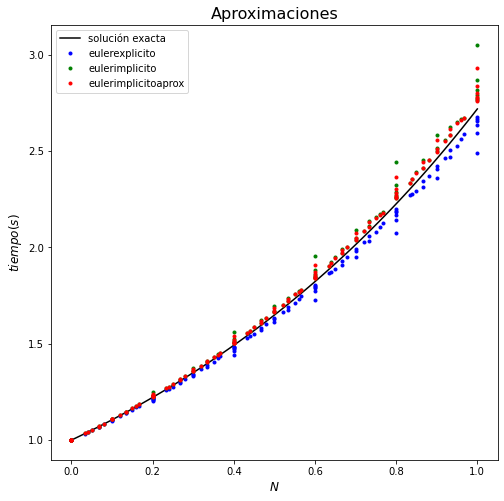

In [9]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = "bgr"
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Representaremos, también, los errores respecto al valor exacto. En el siguiente gráfico, representaremos el valor absoluto máximo de las diferencias entre los valores exactos y los aproximados para cada método y para cada $N$

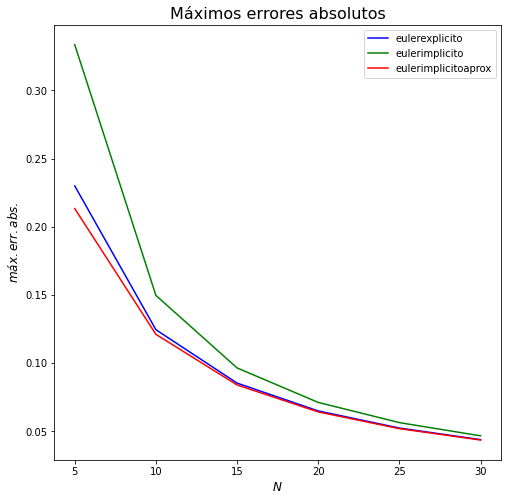

In [10]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgr"
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16);

Podemos ver cómo, en general, el método implícito es computacionalmente el menos eficiente de todos, mientras que el de Euler explícito es el mas eficiente. 

Por otro lado, las aproximaciones más precisas son las de Euler implícito aproximado, seguido de las de Euler explícito y las de Euler implícito. 

En la última gráfica vemos cómo, a menor $h$ (mayor$N$) las aproximaciones son más precisas.

### Ejercicio 2

A partir de la implementación del algoritmo del método de Euler explícito, realice las modificaciones oportunas para obtener también las implementaciones correspondientes a los métodos de Euler mejorado (o del punto medio), así como del de Euler modificado (o de Heun).

In [11]:
%%file   eulermejorado.py
## módulo eulermejorado
''' método de Euler mejorado (o del punto medio) para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h*F(X[n]+h/2,Y[n]+h/2*F(X[n],Y[n])))
    return np.array(X),np.array(Y)

Overwriting eulermejorado.py


In [12]:
%%file   eulermodificado.py
## módulo eulermodificado
''' método de Euler modificado (o de Heun) para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append(Y[n] + h/2*(F(X[n],Y[n])+F(X[n+1],Y[n]+h*F(X[n],Y[n]))))
    return np.array(X),np.array(Y)

Overwriting eulermodificado.py


## Métodos de Taylor

### Ejercicio 3

Realice varios experimentos numéricos, con diferentes valores de $N$, y compare y ratifique los órdenes de convergencia de los diferentes métodos vistos hasta el momento.

Realizaremos las comparaciones con diferentes valores de $N$ para los métodos vistos hasta el momento:

- Método de Eurler Explícito: `eurlerexplicito`
- Método de Euler Implícito: `eulerimplicito`
- Método de Euler Implícito Aproximado: `eurlerimplicitoaprox`
- Método de Euler Mejorado (o del punto medio): `eulermejorado`
- Método de Euler Modificado (o de Heun): `eulermodificado`
- Método de Taylor de orden 2: `taylor2`

In [13]:


%%file taylor2.py
## módulo taylor2
''' método del método de Taylor de orden 2 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting taylor2.py


Realizaremos la comparación usando la función `comparar_metodos` del ejercicio anterior:

In [14]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "taylor2"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox', 'eulermejorado', 'eulermodificado', 'taylor2']
Ejecutando 6 iteraciones de valores de N...
│ 
├── Calculando para i=0, N=5
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 0.00010985100000482362
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.021846926999998573
│   ├── Finalizado método 'eulerimplicitoaprox'
│   │   └── Tiempo de ejecución: 0.0001127270000012004
│   ├── Finalizado método 'eulermejorado'
│   │   └── Tiempo de ejecución: 0.00011068199999897388
│   ├── Finalizado método 'eulermodificado'
│   │   └── Tiempo de ejecución: 7.175599999698079e-05
│   └── Finalizado método 'taylor2'
│       └── Tiempo de ejecución: 0.003610565999991877
├── Calculando para i=1, N=10
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 8.002799999928811e-05
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.10

Text(0.5, 1.0, 'Tiempos de ejecución')

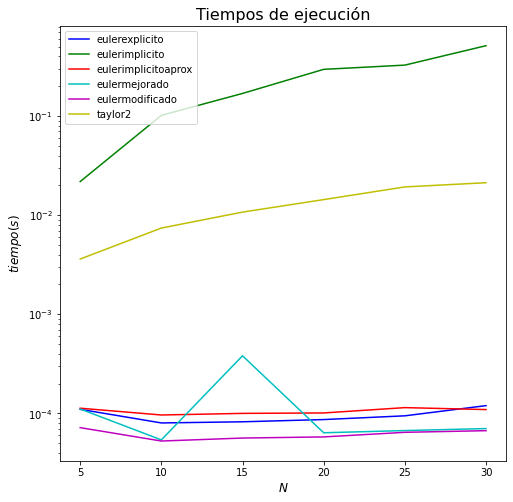

In [15]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgrcmy"
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16)

El método de Euler Implícito es el menos eficiente, seguido del método de Taylor de orden 2; mientras que el resto de métodos tienen una eficiencia similar:

Text(0.5, 1.0, 'Aproximaciones')

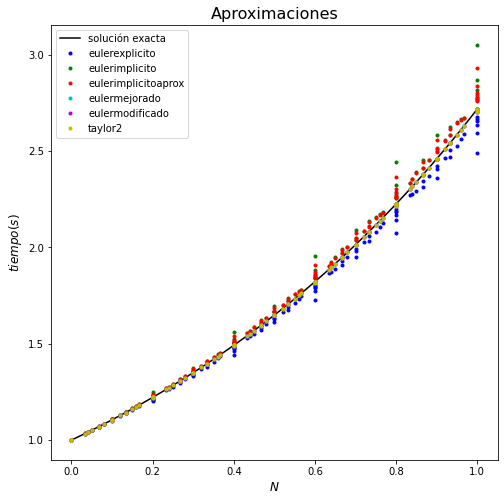

In [16]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = "bgrcmy"
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Text(0.5, 1.0, 'Máximos errores absolutos')

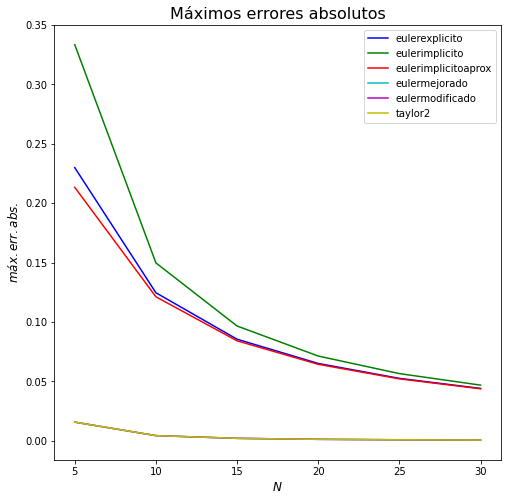

In [17]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = "bgrcmy"
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16)

Como podemos ver, Taylor nos dá la mejor aproximación.

### Ejercicio 4

A partir de la implementación del algoritmo del método de Taylor de orden $p=2$, realice las modificaciones oportunas para obtener también una posible implementación correspondiente al método de Taylor de orden $p=3$.

In [18]:
%%file taylor3.py
## módulo taylor3
''' método del método de Taylor de orden 3 para resolver el PVI
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
def integrate(F,x0,y0,xfinal,N):  
    import numpy as np
    import sympy as sp
    
    t, z = sp.symbols('t, z')
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    
    def F1(t,z):
        return F(t,z)

    def F2(t,z):
        return sp.diff(F(t,z),t) + sp.diff(F(t,z),z)*F1(t,z)
    
    def F3(t,z):
        return sp.diff(F2(t,z),t) + sp.diff(F2(t,z),z)*F1(t,z)
    
    for n in range(N):
        Y.append(Y[n]+h*F1(X[n],Y[n])+h**2/2*F2(t,z).subs({t:X[n],z:Y[n]})+h**3/6*F3(t,z).subs({t:X[n],z:Y[n]}))
    return np.array(X),np.array(Y)

Overwriting taylor3.py


## Métodos de Runge-Kutta

### Ejercicio 5

Repita las aproximaciones anteriores con diferentes valores de $N$ (y por tanto de $h$) y compruebe el efecto en cuanto a mayor o menor precisión, estabilidad y coste computacional

Vamos a realizar la comparación con diferentes valores de $N$ para los métodos vistos hasta este momento:

- Método de Euler Explícito: `eulerexplicito`
- Método de Euler Implícito: `eulerimplicito`
- Método de Euler Implícito Aproximado: `eulerimplicitoaprox`
- Método de Euler Mejorado (O del Punto Medio): `eulermejorado`
- Método de Euler Modificado (O de Heun): `eulermodificado`
- Método de Taylor de Orden 2: `taylor2`
- Método de Taylor de Orden 3: `taylor3`
- Runge-Kutta Clásico (Orden 4): `rk4`

In [19]:
%%file rk4.py
## módulo rk4
''' Método de Runge-Kutta de cuarto orden para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,h).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''
import numpy as np
def integrate(F,x0,y0,xfinal,N):
    
    def RK4(F,xn,yn,h):
        K1 = F(xn,yn)
        K2 = F(xn + h/2, yn + K1*h/2)
        K3 = F(xn + h/2, yn + K2*h/2)
        K4 = F(xn + h  , yn + K3*h)
        return (K1 + 2*K2 + 2*K3 + K4)/6    
    
    X = np.linspace(x0,xfinal,N+1)
    Y = [y0]; h = (xfinal-x0)/N
    for n in range(N):
        Y.append( Y[n] + h*RK4(F,X[n],Y[n],h) )
    return np.array(X),np.array(Y)

Overwriting rk4.py


In [20]:
metodos = ["eulerexplicito", "eulerimplicito", "eulerimplicitoaprox", "eulermejorado", "eulermodificado", "taylor2", "taylor3", "rk4"]
x, y, tiempos = comparar_metodos(metodos, lambda i: 5+5*i, 6, f, a, ya, b)

Comparando los métodos ['eulerexplicito', 'eulerimplicito', 'eulerimplicitoaprox', 'eulermejorado', 'eulermodificado', 'taylor2', 'taylor3', 'rk4']
Ejecutando 6 iteraciones de valores de N...
│ 
├── Calculando para i=0, N=5
│   ├── Finalizado método 'eulerexplicito'
│   │   └── Tiempo de ejecución: 0.000147276999996393
│   ├── Finalizado método 'eulerimplicito'
│   │   └── Tiempo de ejecución: 0.020391228000008255
│   ├── Finalizado método 'eulerimplicitoaprox'
│   │   └── Tiempo de ejecución: 9.243099999878268e-05
│   ├── Finalizado método 'eulermejorado'
│   │   └── Tiempo de ejecución: 5.520999999930609e-05
│   ├── Finalizado método 'eulermodificado'
│   │   └── Tiempo de ejecución: 4.691800000955482e-05
│   ├── Finalizado método 'taylor2'
│   │   └── Tiempo de ejecución: 0.0034582409999899255
│   ├── Finalizado método 'taylor3'
│   │   └── Tiempo de ejecución: 0.006642299999995771
│   └── Finalizado método 'rk4'
│       └── Tiempo de ejecución: 8.122299999513416e-05
├── Calculando 

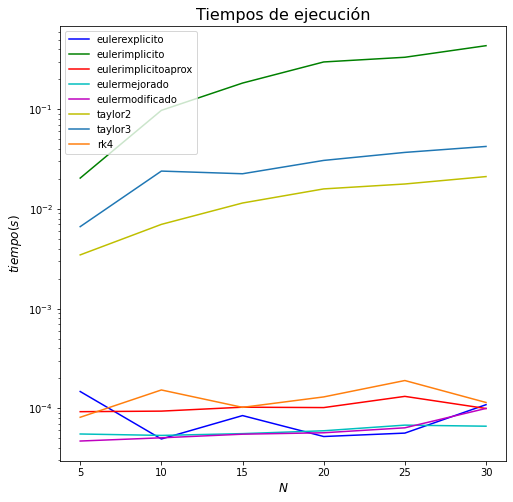

In [21]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']
for metodo in metodos:
    ax.plot(nv,[tiempos[i][metodo] for i in range(6)],colors[metodos.index(metodo)],label=metodo)
ax.set_yscale("log")
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Tiempos de ejecución',fontsize=16);

Text(0.5, 1.0, 'Aproximaciones')

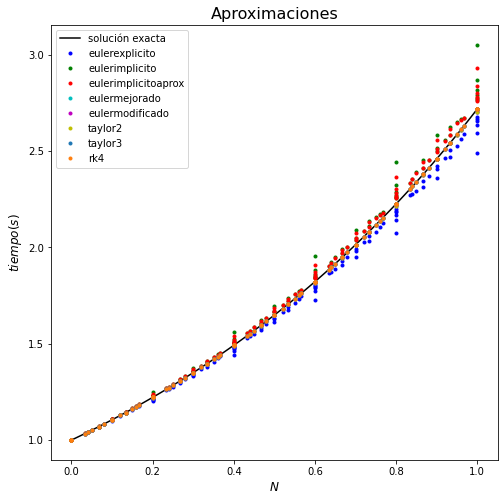

In [22]:
fig,ax = plt.subplots(figsize=(8,8))
xx = np.linspace(a,b,100)
yy = [np.exp(x) for x in xx]
colors = ['b','g','r','c','m','y','C0','C1']
ax.plot(xx,yy,'k',label='solución exacta')
for metodo in metodos:
    ax.plot(x[0],y[0][metodo],colors[metodos.index(metodo)]+'.',label=metodo)
    for i in range(1,6):
        ax.plot(x[i],y[i][metodo],colors[metodos.index(metodo)]+'.')
ax.legend(loc='upper left')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$tiempo (s)$',fontsize=12)
ax.set_title('Aproximaciones',fontsize=16)

Text(0.5, 1.0, 'Máximos errores absolutos')

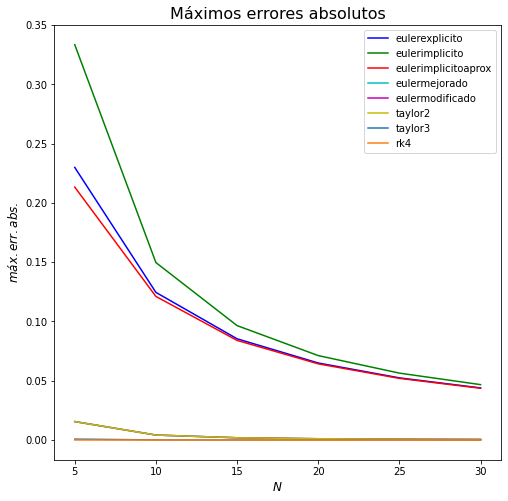

In [23]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']
for metodo in metodos:
    ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16)

Text(0.5, 1.0, 'Máximos errores absolutos')

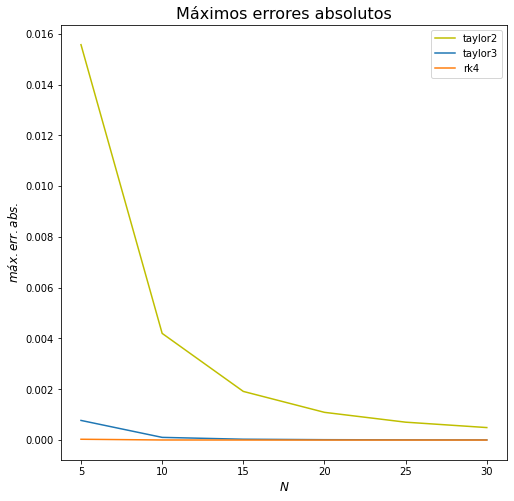

In [24]:
nv = [5+5*i for i in range(6)]
fig,ax = plt.subplots(figsize=(8,8))
colors = ['b','g','r','c','m','y','C0','C1']
for metodo in metodos:
    if metodo not in metodos[:5]:
        ax.plot(nv,[abs([np.exp(p) for p in x[i]]-y[i][metodo]).max() for i in range(6)],colors[metodos.index(metodo)],label=metodo)
#ax.set_yscale("log")
ax.legend(loc='upper right')
ax.set_xlabel('$N$',fontsize=12)
ax.set_ylabel('$máx.err.abs.$',fontsize=12)
ax.set_title('Máximos errores absolutos',fontsize=16)

Vemos que el orden de convergencia es mayor en el caso de `rk4`. Por otra parte, todos los métodos obtenidos son estables

### Ejercicio 6

A partir de la implementación del algoritmo del método de Runge-Kutta de 4 evaluaciones, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Runge-Kutta, tanto explícitos como implícitos, a partir del correspondiente arreglo de Butcher

Dado que un método de Runge-Kutta queda determinado por su arreglo de Butcher, crearemos un módulo `rk` en el que podremos calcular cualquier método de Runge-Kutta

>Tras probar diversas implementaciones, no he encontrado una forma de obtener el método en el caso implícito. En caso de los RK implícitos, podríamos programarlos de forma manua, haciendo uso de `solve`, `sympy` o `numpy`

Este módulo no sólo integra la función `integrate`, sino que también contiene una clase, `Butcher`, para poder manejar de una forma más versátil los arreglos de Butcher:

In [25]:
%%file rk.py
## módulo rk

class Butcher:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
    
    def __repr__(self):
        s = ''
        for i in range(len(self.a)):
            s += "{: >6} │ ".format(str(self.c[i])[:6])
            for j in range(len(self.a)):
                s += "{: >6} ".format(str(self.a[i][j])[:6])
            s += '\n'
        s += "───────┼─"
        for i in range(len(self.a)):
            s += "───────"
        s += "\n       │ "
        for i in range(len(self.a)):
            s += "{: >6} ".format(str(self.b[i])[:6])
        return s
    
    @classmethod
    def from_matrix(self,matrix):
        a = []
        b = []
        c = []
        for i in range(len(matrix)-1):
            c.append(matrix[i][0])
            b.append(matrix[len(matrix)-1][i+1])
            v = []
            for j in range(len(matrix)-1):
                v.append(matrix[i][j+1])
            a.append(v)
        return Butcher(a,b,c)

    def is_explicit(self):
        explicit = True
        for i in range(len(self.a)):
            for j in range(i+1, len(self.a)):
                if self.a[i][j] != 0:
                    explicit = False
        return explicit


''' método Runge-Kutta explícito para resolver el PVI a partir de un arreglo de Butcher
    X,Y     = integrate(F,x0,y0,xfinal,N).
    {y}'    = {F(x,{y})}, donde
    {y}     = {y[0],y[1],...y[N-1]}.
    x0,y0   = condiciones iniciales 
    xfinal  = valor final de la variable x
    h       = incremento de x usado para la integración
    F       = función suplida por el usuario que devuelve 
            el array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
    butcher = arreglo de Butcher para el método
'''
def integrate(F,x0,y0,xfinal,butcher,N):
    import numpy as np
    
    if ( butcher.is_explicit() ):
        def phi(F,x0,y0,h,butcher):
            tam = len(butcher.a)
            k0 = F(x0,y0)
            k = np.array([k0])
            
            for i in range(1, tam):
                kx = 0
                for j in range(i):
                    kx += k[j] * butcher.a[i][j]
                k = np.append(k, F(x0 + h*butcher.c[i], y0 + h*kx))
                
            return np.dot(butcher.b, k)

        
        X = np.linspace(x0,xfinal,N+1)
        Y = [y0]; h = (xfinal-x0)/N
        
        for n in range(N):
            Y.append( Y[n] + h*phi(F,X[n],Y[n],h, butcher) )
        
        return np.array(X),np.array(Y)
    else:
        print("Debe tratarse de un método explicito")
        return None

Overwriting rk.py


En el módulo `rk` hemos definido una clase, `Butcher`. Esta clase es la que el método `integrate` tomará como parámetro para el método de Runge-Kutta. Por ejemplo, veamos que podemos expresar RK2 explícito como:

In [26]:
import rk

alpha = 1/2
beta = 1
butcher_rk2 = rk.Butcher(
    b=[1-alpha, alpha],
    c=[0, beta],
    a=[[0,0],[beta,0]]
)

In [27]:
butcher_rk2

     0 │      0      0 
     1 │      1      0 
───────┼───────────────
       │    0.5    0.5 

Y ahora podemos usar RK2 para aproximar nuestra $f$:

In [28]:
rk.integrate(f,a,ya,b,butcher_rk2,10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.105     , 1.221025  , 1.34923262, 1.49090205,
        1.64744677, 1.82042868, 2.01157369, 2.22278892, 2.45618176,
        2.71408085]))

Comprobaremos que nuestra implementación es correcta comparando los valores de RK4 obtenidos anteriormente en el módilo `rk4`

In [29]:
import rk4; rk4.integrate(f,a,ya,b,10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.10517083, 1.22140257, 1.3498585 , 1.49182424,
        1.64872064, 1.82211796, 2.01375163, 2.22553956, 2.45960141,
        2.71827974]))

con el nuevo módulo `rk`. Nótese que, además, la clase `rk.Butcher` nos permite introducir arreglos de Butcher en forma matricial. El arreglo de Butcher de RK4 es:

$$\begin{pmatrix}
        0\\
        1/2 & 1/2 \\
        1/2 & 0 & 1/2 \\
        1 & 0 & 0 & 1 \\
        \hline
        & 1/6 & 1/3 & 1/3 & 1/6 \\
   \end{pmatrix}$$

Observemos que coinciden los resultados:

In [30]:
rk.integrate(
    f,a,ya,b,
    rk.Butcher.from_matrix([
        [0, 0, 0, 0, 0],
        [1/2, 1/2, 0, 0, 0],
        [1/2, 0, 1/2, 0, 0],
        [1, 0, 0, 1, 0],
        [None, 1/6, 1/3, 1/3, 1/6] # el elemento de la esquina inferior izquierda será ignorado
    ]),
    10)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([1.        , 1.10517083, 1.22140257, 1.3498585 , 1.49182424,
        1.64872064, 1.82211796, 2.01375163, 2.22553956, 2.45960141,
        2.71827974]))

## Métodos Multipaso Lineales (MML)

### Ejercicio 7

A partir de la implementación del algoritmo del método de Adams-Bashforth anterior, realice las modificaciones oportunas para intentar obtener también las implementaciones correspondientes a otros muchos métodos de tipo Adams, como Adams-Moulton (AM), Milne-Simpson, Nyström y/o Newton-Cotes.

Para un método de $k$ pasos son necesarios las semillas
$$x_0,x_1,...,x_{k-1}$$
Calcularemos $x_0,x_1,...,x_{k-1}$ con Euler. Programaremos el método de Adams-Moulton con $k=2$, que es
$$x_{n+2}=x_{n+1}+h\left(\frac{5}{12}f_{n+2}+\frac{2}{3}f_{n+1}-\frac{1}{12}f_n\right)$$

y con $k=3$, que es
$$x_{n+3}=x_{n+2}+h\left(\frac{9}{24}f_{n+3}+\frac{19}{24}f_{n+2}-\frac{5}{24}f_{n+1}+\frac{1}{24}f_n\right)$$

In [31]:
%%file am2.py
## módulo am2
''' Método de Adams-Moulton (con k = 2) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AM2(F,x0,y0,y1,y2,h):
        return 5/12*F(x0+2*h, y2) + 2/3*F(x0+h, y1) - 1/12*F(x0,y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    y1 = y0 + h*F(x0,y0); Y = [y0,y1]
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*AM2(F,X[n],Y[n],Y[n+1],y2,h)-y2,y2)[0])
    return np.array(X),np.array(Y)

Overwriting am2.py


In [32]:
%%file am3.py
## módulo am3
''' Método de Adams-Moulton (con k = 3) para resolver
    el problema de valores iniciales {y}' = {F(x,{y})}, 
    donde    {y} = {y[0],y[1],...y[N-1]}.
    X,Y    = integrate(F,x0,y0,xfinal,N).
    x0,y0  = condiciones iniciales
    xfinal = valor final de x
    N      = número de subintervalos de la partición
    h      = incremento de x usado en la integración
    F      = función suplida por el usuario que devuelve el
            array F(x,y) = {y'[0],y'[1],...,y'[N-1]}.
'''

def integrate(F,x0,y0,xfinal,N):
    
    import numpy as np
    
    def AM3(F,x0,y0,y1,y2,y3,h):
        return 9/24*F(x0+3*h, y3) + 19/24*F(x0+2*h, y2) - 5/24*F(x0+h, y1) + 1/24*F(x0, y0)
    
    X = np.linspace(x0,xfinal,N+1)
    h = (xfinal-x0)/N
    Y = [y0]
    for i in range(3-1):  # num_pasos - 1
        y1 = y0 + h*F(x0,y0)
        Y.append(y1)
        y0 = y1
        
    for n in range(N-1):
        Y.append(sp.solve(Y[n]+h*AM3(F,X[n],Y[n],Y[n+1],Y[n+2],y3,h)-y3,y2)[0])
    return np.array(X),np.array(Y)

Overwriting am3.py


## Métodos de Predictor-Corrector

### Ejercicio 8

Intente la implementación del algoritmo de tipo Predictor-Corrector anterior, o cualquier otro adecuado, eligiendo convenientemente los otros métodos necesarios para proporcionar los valores previos necesarios.

Implementaremos el siguiente método predictor-corrector, compuesto por un predictor Adams-Bashforth de 3 pasos y un corrector Adam-Bashforth-Moulton de 4 pasos, como sigue:

$$P:y^{(0)}_{n+3}=y_{n+2}+h\left(\frac{23}{12}f_{n+2}-\frac{4}{3}f_{n+1}+\frac{5}{12}f_{n}\right)$$

$$C^1:y_{n+4}=y_{n+3}+h\left(\frac{3}{8}f(t_{n+4},y_{n+4}^{(0)})+\frac{19}{24}f_ {